In [1]:
import numpy as np 
#from sympy import *
import matplotlib.pyplot as plt  

In [2]:
particle = 4
# Maybe we deal with only the 
# two-pair problem first.
line = 6

delta = 1.0

In [3]:
# set the particles to pairs
pair = particle/2
if(particle%2 != 0):
	print('Odd number of particles.')
	exit(0)

if(pair>line):
	print('Wrong configuration.')
	exit(0)
 

if(pair==1):
	states=[ i for i in range(line)] 
elif(pair==2):
	states = [(i,j) for i in range(line) 
	                for j in range(i,line) if j!=i]
elif(pair==3):
	states = [(i,j,k) for i in range(line) 
	                  for j in range(i,line) 
	                  for k in range(j,line) 
	                  if j!=i and k!=j]
elif(pair==4):
	states = [(i,j,k,l) for i in range(line) 
	                    for j in range(i,line) 
	                    for k in range(j,line) 
	                    for l in range(k,line) 
	                    if j!=i and k!=j and l!=k]	                  

config_num  = len(states)

print('There are %d states: \n'  %config_num)
print(states)

print('\n')

There are 15 states: 

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]




In [4]:
# evaluate the sp operator 
def h_sp(A):
	if(pair==1):
		return A
	else:
		return sum(A)

In [5]:
# evaluate the pair term 
def h_pr(A,B):
	if(pair==1):
		if(A==B):
			return 2
		else:
			return 1
	else:	
		if(len(A)!=len(B)):
			print('Something wrong.')
			exit(0)
		elif(pair!=1):
			n = len(A)
		s1 = set(A)
		s2 = set(B)
		m = len(s1&s2)
   
		if(n==m):
			return 2
		elif(n - m ==1):
			return 1
		else:	
			return 0

In [6]:
# initialize a unit matrix with define dimension 
H = np.eye(config_num)

Hc= [ ['123' for i in range(config_num)] 
      for i in range(config_num)]


# The form of the matrix...
print('The form of the matrix is: \n')
for i in range(config_num): 
	for j in range(config_num):
		Hc[i][j]='-'+str(int(h_pr(states[i],states[j])))+'g'
		if(i==j):
			Hc[i][j] = Hc[i][j] + '+' \
			       + str(int(2*delta*h_sp(states[i])))   \
			       +'d'


for i in range(len(states)):
	print(Hc[i])

print('\n')

The form of the matrix is: 

['-2g+2d', '-1g', '-1g', '-1g', '-1g', '-1g', '-1g', '-1g', '-1g', '-0g', '-0g', '-0g', '-0g', '-0g', '-0g']
['-1g', '-2g+4d', '-1g', '-1g', '-1g', '-1g', '-0g', '-0g', '-0g', '-1g', '-1g', '-1g', '-0g', '-0g', '-0g']
['-1g', '-1g', '-2g+6d', '-1g', '-1g', '-0g', '-1g', '-0g', '-0g', '-1g', '-0g', '-0g', '-1g', '-1g', '-0g']
['-1g', '-1g', '-1g', '-2g+8d', '-1g', '-0g', '-0g', '-1g', '-0g', '-0g', '-1g', '-0g', '-1g', '-0g', '-1g']
['-1g', '-1g', '-1g', '-1g', '-2g+10d', '-0g', '-0g', '-0g', '-1g', '-0g', '-0g', '-1g', '-0g', '-1g', '-1g']
['-1g', '-1g', '-0g', '-0g', '-0g', '-2g+6d', '-1g', '-1g', '-1g', '-1g', '-1g', '-1g', '-0g', '-0g', '-0g']
['-1g', '-0g', '-1g', '-0g', '-0g', '-1g', '-2g+8d', '-1g', '-1g', '-1g', '-0g', '-0g', '-1g', '-1g', '-0g']
['-1g', '-0g', '-0g', '-1g', '-0g', '-1g', '-1g', '-2g+10d', '-1g', '-0g', '-1g', '-0g', '-1g', '-0g', '-1g']
['-1g', '-0g', '-0g', '-0g', '-1g', '-1g', '-1g', '-1g', '-2g+12d', '-0g', '-0g', '-1g', '-0g', '

In [7]:
# Now consider the  


coupling = np.linspace(-1,1,11)

egv = [] # as the eigenvalue of H
crt = [] # as the correlation energy



# find the minimum of the eigenvalues 
for g in coupling:
# construction of the Hamiltonian
	for i in range(config_num): 
		for j in range(config_num):
			H[i,j]=-g*h_pr(states[i],states[j])
			if(i==j):
				H[i,j] = H[i,j] + delta*h_sp(states[i])


    # get the eigenvalues of H
	u, v = np.linalg.eig(H)
	egv.append(min(u))

	if(pair==1):
	    crt.append(min(u) + 2*g)
	else:
		crt.append(min(u)- sum(states[0])* delta + 2*g)

for i in range(len(crt)): 		
	 print(crt[i])

-1.2168212867275818
-0.8899412327023004
-0.5850688280055709
-0.31383341852221136
-0.09935634745855415
0.0
-0.18805523235156585
-0.8963690733690393
-2.0147757814463416
-3.3364551606788164
-4.75911970624249


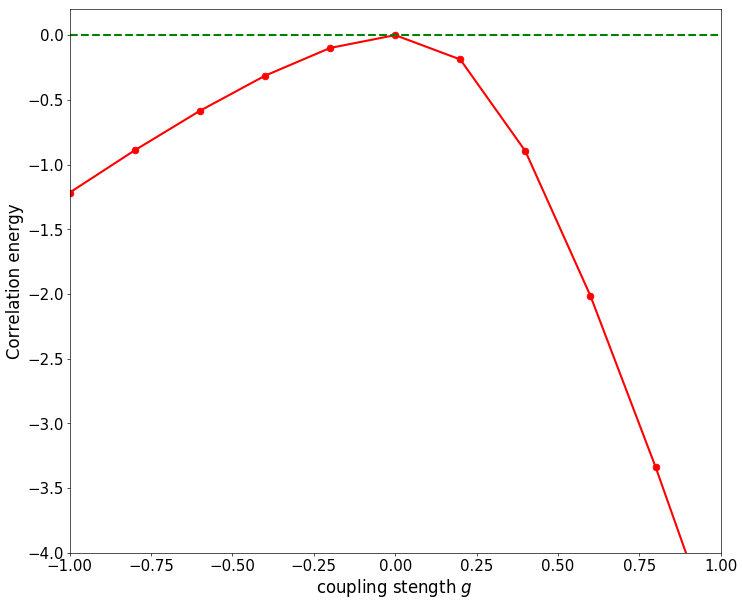

In [8]:
#plt.tick_params(width=20,direction='in',
#	            labelsize='large')
plt.figure(figsize=(14,12),dpi=60)

plt.plot(coupling,crt,'r-o',lw=2.5, markersize=8)
plt.plot((-1,1),(0,0),'g--',lw=2.5)
plt.xlim(-1,1)
plt.ylim(-4,0.2)
plt.xlabel('coupling stength $g$ ',fontsize=20)
plt.ylabel('Correlation energy',fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)
plt.savefig('result.pdf',format='pdf')
